# Predicting Nationality of Individuals
# Using their Names with ML

In [1]:
#Load Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np

In [2]:
# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [3]:
# Load Dataset
df = pd.read_csv("f.csv")
df.dropna(inplace=True)

# Dataset Exploration

In [4]:
df.shape

(404061, 2)

In [5]:
df.head()

,Name,Nationality
0,Amy Johnson,AE
1,Thomas Wright,AE
2,Mr. Marco Flores DDS,AE
3,Marcus Robbins,AE
4,Susan Montgomery,AE


In [6]:
df.columns

Index(['Name', 'Nationality'], dtype='object')

In [7]:
df['Nationality'].unique()

array(['AE', 'EG', 'JO', 'PS', 'SA', 'AZ', 'BG', 'BD', 'BA', 'CZ', 'DK',
       'DE', 'AT', 'CH', 'CY', 'GR', 'AU', 'CA', 'GB', 'IE', 'IN', 'NZ',
       'PH', 'TH', 'US', 'ES', 'CO', 'MX', 'EE', 'IR', 'FI', 'FR', 'IL',
       'HR', 'HU', 'AM', 'ID', 'IT', 'JP', 'GE', 'KR', 'LA', 'LU', 'LT',
       'LV', 'MT', 'NP', 'BE', 'NL', 'NO', 'PL', 'BR', 'PT', 'RO', 'RU',
       'SK', 'SI', 'SE', 'TR', 'GH', 'UA', 'CN', 'TW'], dtype=object)

In [8]:
class_names =['AE', 'EG', 'JO', 'PS', 'SA', 'AZ', 'BG', 'BD', 'BA', 'CZ', 'DK',
       'DE', 'AT', 'CH', 'CY', 'GR', 'AU', 'CA', 'GB', 'IE', 'IN', 'NZ',
       'PH', 'TH', 'US', 'ES', 'CO', 'MX', 'EE', 'IR', 'FI', 'FR', 'IL',
       'HR', 'HU', 'AM', 'ID', 'IT', 'JP', 'GE', 'KR', 'LA', 'LU', 'LT',
       'LV', 'MT', 'NP', 'BE', 'NL', 'NO', 'PL', 'BR', 'PT', 'RO', 'RU',
       'SK', 'SI', 'SE', 'TR', 'GH', 'UA', 'CN', 'TW']

In [9]:
len(class_names)

63

In [10]:
df.groupby('Nationality')['Name'].size()


Nationality
AE     5913
AM     4892
AT     6032
AU     4403
AZ     5470
      ...  
TH    17326
TR     5997
TW     4162
UA     6076
US     3953
Name: Name, Length: 63, dtype: int64

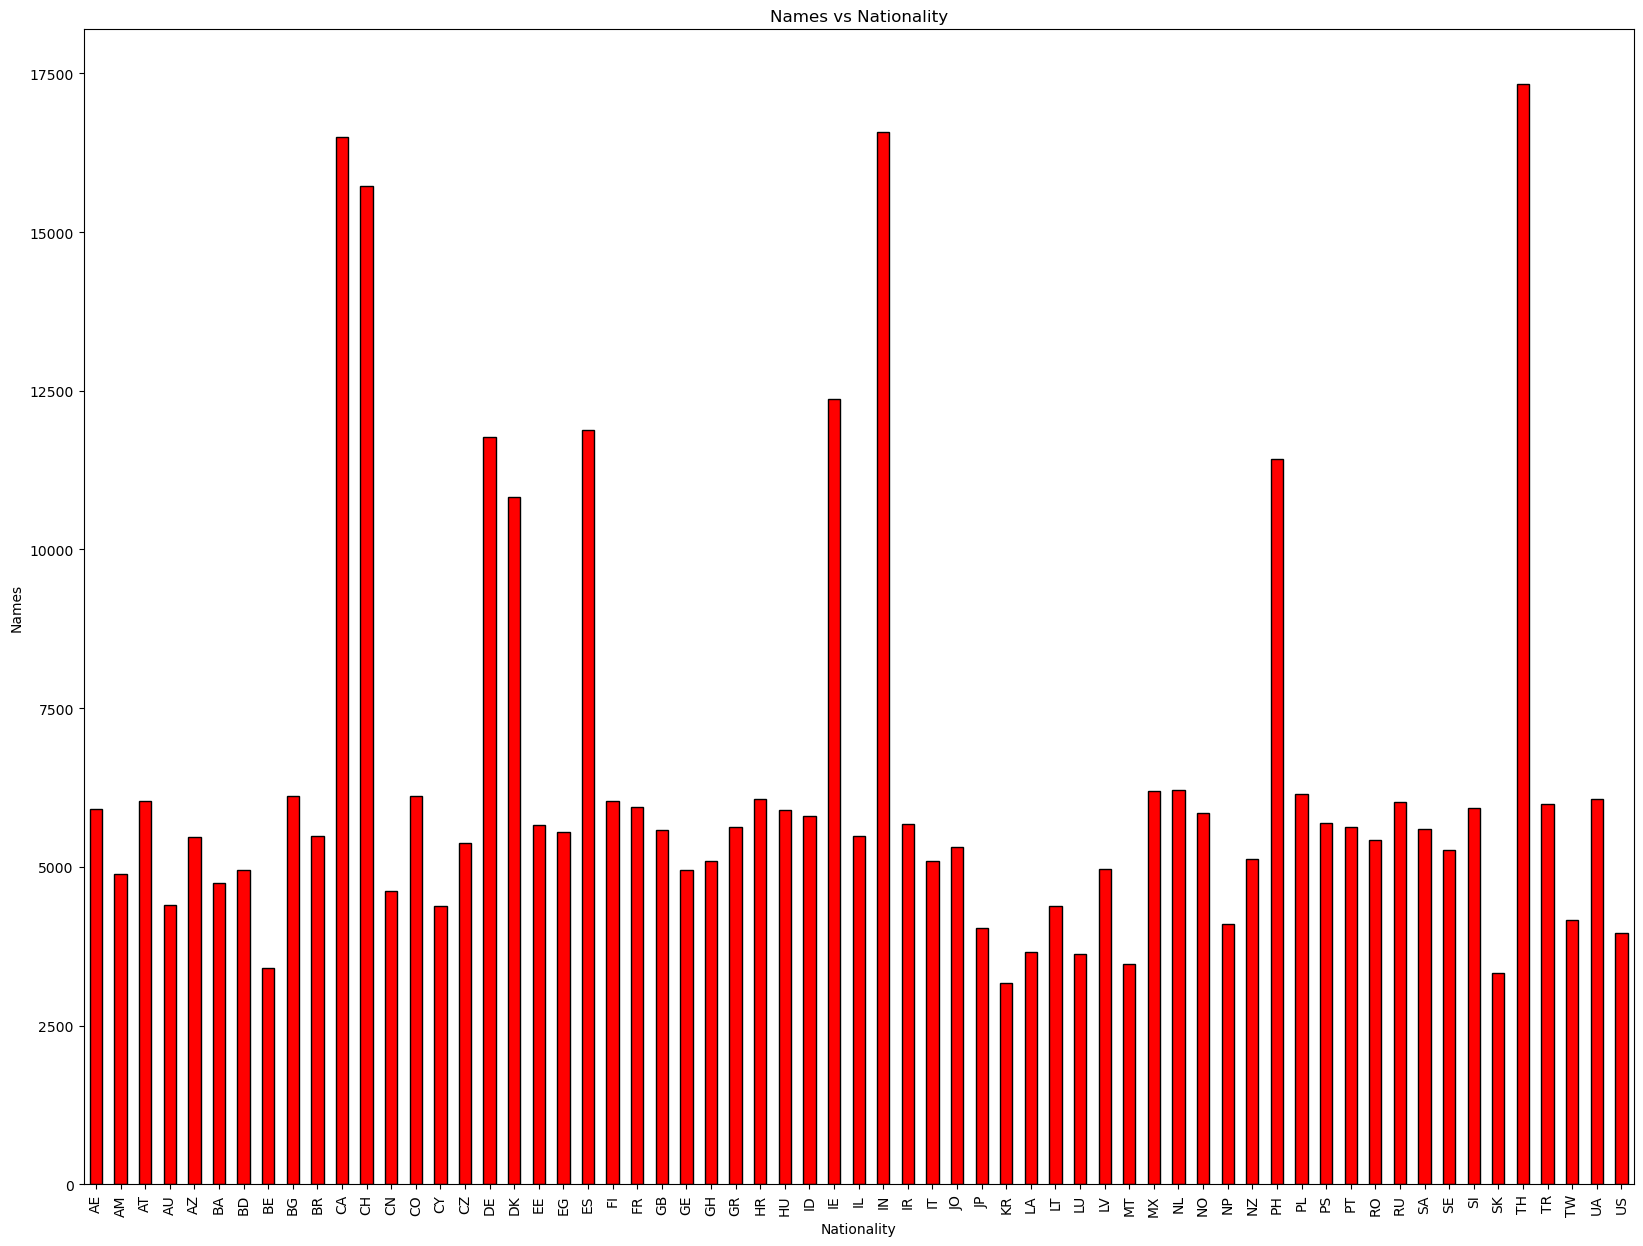

In [11]:
import matplotlib.pyplot as plt
df.groupby('Nationality')['Name'].size().plot(kind='bar',figsize=(20,15),color='red',edgecolor='black')
plt.xlabel("Nationality")
plt.ylabel("Names")
plt.title("Names vs Nationality")
plt.show()

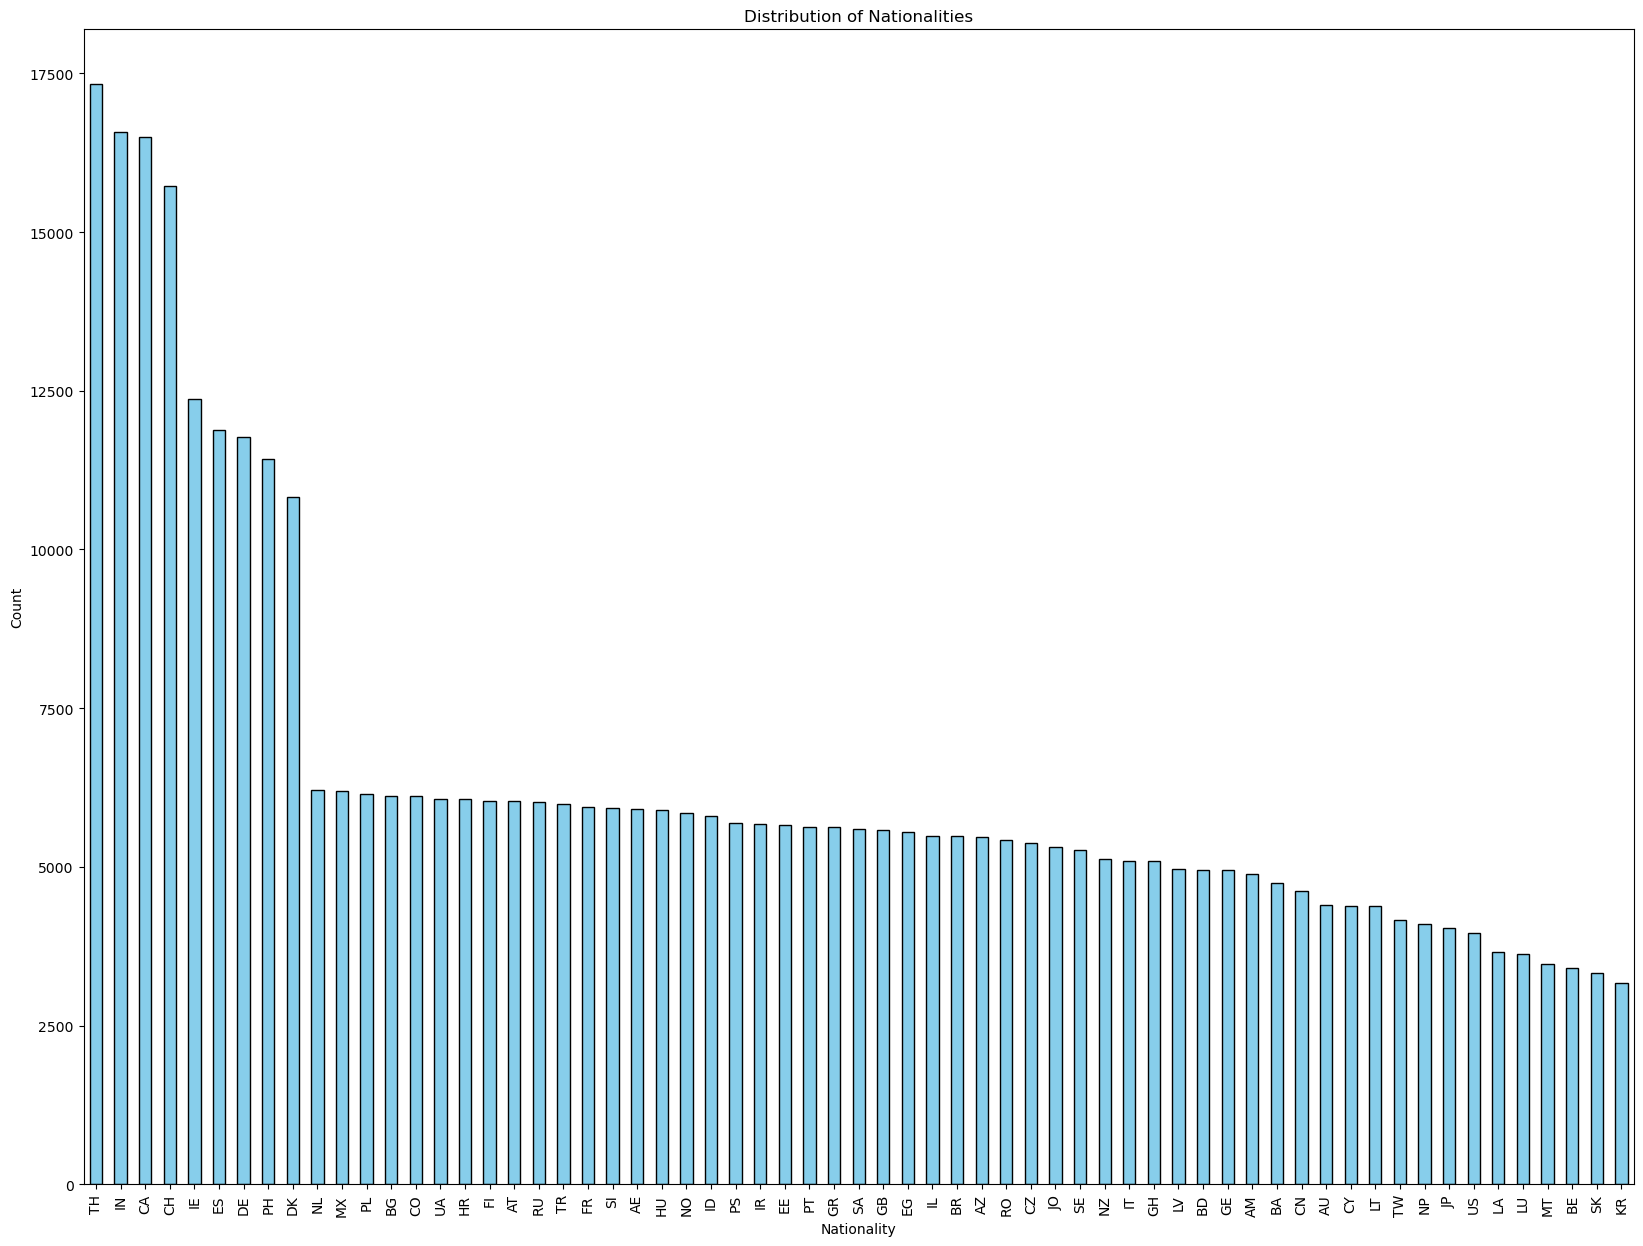

In [12]:
# Count the occurrences of each nationality
nationality_counts = df['Nationality'].value_counts()

# Plot bar chart
plt.figure(figsize=(20, 15))
nationality_counts.plot(kind='bar', color='skyblue',edgecolor='Black')

# Add labels and title
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Distribution of Nationalities')
plt.show()



# Text Vectorization

In [13]:
# Features
Xfeatures = df['Name']
ylabels= df['Nationality']

In [14]:
# Vectorize Features
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)


In [15]:
cv.get_feature_names_out()

array(['000', '0d', '10th', ..., '韋瑋', '音le', '高思'], dtype=object)

In [16]:
# Save Our Vectorizer
import joblib


In [17]:
nationality_vectorizer = open("nationality_vectorizer.pkl","wb")
joblib.dump(cv,nationality_vectorizer)

In [18]:
nationality_vectorizer.close()

# Split Dataset into Train/Test

In [19]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.2,random_state=42)


# Build Model

In [20]:
nv = MultinomialNB()
nv.fit(x_train,y_train)


MultinomialNB()

# Model Evaluation

In [21]:
nv.score(x_test,y_test)
print("The accuracy of the model is ",nv.score(x_test,y_test)*100)


The accuracy of the model is  71.98965512974398


# Sample Testing

In [22]:
sample1 = ["Mansi"]

In [23]:
vect1 = cv.transform(sample1).toarray()

In [24]:
nv.predict(vect1)

array(['SA'], dtype='<U2')

In [25]:
sample2= ["Li","John","singh","Vladmir"]

In [26]:
vect2 = cv.transform(sample2).toarray()

In [27]:
nv.predict(vect2)

array(['CN', 'PH', 'IN', 'TH'], dtype='<U2')

# A Decision Tree is a supervised learning algorithm used for classification and regression. It makes decisions by recursively splitting the dataset into subsets based on the features that best separate the target classes. These splits are determined by selecting features that result in the highest information gain or purity measures like Gini impurity or entropy.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Note
Support is the number of actual occurrences of the class in the specified dataset. It is the number of true instances for each class.
The F1-score is the harmonic mean of precision and recall. 
Precision is the ratio of true positive predictions to the total number of positive predictions made by the model.
Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset

In [29]:
X = df.drop('Nationality', axis=1)
y = df['Nationality']

# Encoding categorical variables (if needed)
le = LabelEncoder()
X['Name'] = le.fit_transform(X['Name'])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a classification model (e.g., Decision Tree)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Additional metrics and classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 79   6  13 ...   0   3  39]
 [  5 548  10 ...   1  26   3]
 [  6   9 313 ...   0  10   7]
 ...
 [  0   3   0 ... 475   0   0]
 [  4  25  11 ...   2 662   0]
 [ 55   2   9 ...   0   2  25]]

Classification Report:
              precision    recall  f1-score   support

          AE       0.06      0.07      0.06      1211
          AM       0.55      0.55      0.55       990
          AT       0.27      0.26      0.26      1202
          AU       0.03      0.03      0.03       848
          AZ       0.67      0.67      0.67      1080
          BA       0.03      0.03      0.03       991
          BD       0.06      0.06      0.06       978
          BE       0.02      0.02      0.02       655
          BG       0.55      0.56      0.55      1258
          BR       0.61      0.58      0.59      1125
          CA       0.37      0.36      0.36      3344
          CH       0.29      0.28      0.28      3167
          CN       0.59      0.60      0.59       904
         

# Saving the Build Model

In [30]:
import joblib


In [31]:
nationality_nv_model = open("nationality_nv_model.pkl","wb")
modelname=nationality_nv_model
joblib.dump(nv,nationality_nv_model)

In [32]:
nationality_nv_model.close()

# Nationality Prediction

In [33]:
loaded_model = joblib.load("nationality_nv_model.pkl")


In [39]:
sample1 = ["Muhammed Ali"]

In [40]:
vect1 = cv.transform(sample1).toarray()

In [41]:
prediction = loaded_model.predict(vect1)

print(f"The predicted nationality for the input vector is: {prediction}")

The predicted nationality for the input vector is: ['IR']
